# Data Pre-Processing

Aims of this practical:

* Identify continuous and discrete variables
* Learn how to standardise and normalise data
* Deal with missing and extreme data
* Transform discrete variables into numerical ones

In this practical, we use `sklearn` and other libraries we have seen so far:

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the data

`rental_data.csv` contains 410 records, each one representing a rental property. The variables associated with each property record indicate the neighbourhood it is in, how many people it accommodates, how many bathrooms and bedrooms there are, the rental price, the property size in square feet, the score given by reviewers and the number of reviews.

Let's load the file and look at each variable in turn.

In [45]:
data = pd.read_csv('rental_data.csv')

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_neighbourhood    410 non-null    object 
 1   accommodates          410 non-null    int64  
 2   bathrooms             410 non-null    float64
 3   bedrooms              410 non-null    int64  
 4   price                 410 non-null    int64  
 5   review_scores_rating  402 non-null    float64
 6   square_feet           410 non-null    int64  
 7   number_of_reviews     410 non-null    int64  
 8   reviews_per_month     410 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 29.0+ KB


,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
count,410.000000,410.000000,410.000000,410.000000,402.000000,410.000000,410.000000,410.000000
mean,3.126829,1.151220,2.329268,244.029268,95.194030,599.536585,71.243902,5.936992
std,1.832473,0.386586,14.788364,1197.346763,3.838662,1410.699107,94.955138,7.912928
min,1.000000,1.000000,0.000000,28.000000,75.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,99.000000,93.000000,0.000000,13.000000,1.083333
50%,2.000000,1.000000,1.000000,135.000000,96.000000,479.500000,37.000000,3.083333
75%,4.000000,1.000000,2.000000,199.000000,98.000000,807.000000,88.000000,7.333333
max,16.000000,4.000000,300.000000,20000.000000,100.000000,22600.000000,570.000000,47.500000


For each variable, is it continuous or discrete?

Will it need to be pre-processed and, if so, how? What pre-processing tools would you use?

In [ ]:
# Your thoughts here...
'''
Yes it will need to be processed. 
We can see that the data is on different scales and will therefore likely need to be scaled depending on the model we use.
We can also see that there are discrete values so we may want to use one hot encoding to deal with this.
Lastly the review_scores_rating column has missing values to deal with.
'''


### Using `ydata_profiling` to quickly explore data

The `ydata_profiling` package generates detailed summaries of all variables in a dataset.

It can be a great first step to explore data and see if there are any issues you need to deal with, like missing values or zeroes and so on.

It renders an interactive HTML frame inside your Python notebook. If you want to save this to a file, use the `.to_json()` or `.to_html()` method of the profile object.

This step can take some time to process and show the exploratory analysis.

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df=data, title="Pandas Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:  15%|█▌        | 12/80 [00:00<00:02, 23.04it/s, scatter accommodates, accommodates]   


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\valere.demelier\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\valere.demelier\AppData\Local\Temp\ipykernel_34824\3263114789.py", line 5, in <module>
    profile.to_notebook_iframe()
  File "c:\Users\valere.demelier\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\profile_report.py", line 500, in to_notebook_iframe
    display(get_notebook_iframe(self.config, self))
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\valere.demelier\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\report\presentation\flavours\widget\notebook.py", line 75, in get_notebook_iframe
    output = get_notebook_iframe_srcdoc(config, profile)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\valere.demelier\AppData\Local\Programs\Python\Python31

### Sanity checking

There are values of `0`s for some rows for the columns `number_of_reviews` and `reviews_per_month`. This is  plausible since some properties can have no reviews just yet.

Examine the rows where either of these variables is equal to zero.

In [46]:
# Your code here...
# Filter data to where number_of_reviews and reviews_per_month are both 0
zero_reviews = data[(data['number_of_reviews'] == 0) & (data['reviews_per_month'] == 0)]
zero_reviews


,host_neighbourhood,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
0,Indische Buurt,4,1.0,2,750,NaN,592,0,0.0
103,Grachtengordel,4,1.0,1,130,NaN,700,0,0.0
136,Indische Buurt,2,1.0,1,150,NaN,753,0,0.0
155,Oud-West,4,1.0,2,139,86.0,70,0,0.0
160,Indische Buurt,2,1.0,1,115,92.0,1453,0,0.0
225,Oud-West,3,1.0,3,150,95.0,1023,0,0.0
307,Indische Buurt,4,2.5,2,250,NaN,215,0,0.0
311,Oud-West,3,1.0,2,120,NaN,807,0,0.0
315,Grachtengordel,3,1.0,2,110,NaN,592,0,0.0
376,De Pijp,2,1.0,1,95,NaN,0,0,0.0


 What is the `review_scores_rating`? What would you expect it to be if there are no reviews?

In [ ]:
# Your thoughts here...
'''
The review scores rating is a rating based on the score and number of reviews?
If reviews are missing than the scores should be NA
'''


Some values for `number_of_reviews`, `reviews_per_month`, `review_scores_rating`, and `square_feet` do not hold, and corresponding rows needs to be dropped:

* Drop rows with `NaN`s in `review_scores_rating`
* Drop rows with `review_scores_rating` > 0 but `number_of_reviews` == 0

In [47]:
# Drop rows with NaN in `review_scores_rating`
# Your code here...
data = data.dropna(subset=['review_scores_rating'])



In [48]:
# Drop rows with `review_scores_rating` > 0 but `number_of_reviews` == 0
# Your code here...
data = data[~((data["number_of_reviews"] == 0) & (data["review_scores_rating"] == 0))]

## Outliers

Look again at a summary of the values...

In [49]:
data.describe(percentiles=[0.99])

,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,3.109453,1.146766,2.335821,243.788557,95.194030,602.365672,72.661692,6.055141
std,1.815137,0.378146,14.934075,1208.846245,3.838662,1423.872580,95.357654,7.946471
min,1.000000,1.000000,0.000000,28.000000,75.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,135.000000,96.000000,453.000000,37.000000,3.083333
99%,11.970000,2.495000,9.950000,694.050000,100.000000,2150.850000,429.870000,35.822500
max,16.000000,4.000000,300.000000,20000.000000,100.000000,22600.000000,570.000000,47.500000


Are there any columns with suspicious values?

In [ ]:
# Your thoughts here...
# Bedrooms!


### Visualising the data

A boxplot quickly shows us the distribution of continuous variables. `seaborn` has a method for it.

In [ ]:
g = sns.boxplot(data=data)

plt.xticks(rotation=90);

### Removing outliers

Using the zscore, find any rows where the value for `bedrooms`, `price` or `square_feet` is more than 3 standard deviations from the column mean.

Print them out to see their values and then add the index of the row to the list `to_drop`.

Then use that to drop the outliers.

**IMPORTANT NOTE:** this is an exercise to show how outliers can be identified using the standard deviation. Dropping observations deemed to be outliers like this is **not advised**, unless you are **very clear** on the implications!

In [55]:
x

,square_feet
1,0.069516
2,-0.082025
3,0.084249
4,0.635691
5,15.434121
...,...
404,-0.157094
405,-0.421590
406,-0.421590
407,-0.421590


In [52]:
def zscore(sample):
    
    mean = sample.mean()
    std = sample.std()
    
    return (sample - mean) / std

to_drop = []
# Your code here...
x = data[['bedrooms']].apply(zscore)[['bedrooms']] 
to_drop.append(x[(x["bedrooms"] <= -3) | (x["bedrooms"] >= 3)].index.tolist())
x = data[['price']].apply(zscore)[['price']] 
to_drop.append(x[(x["price"] <= -3) | (x["price"] >= 3)].index.tolist())
x = data[['square_feet']].apply(zscore)[['square_feet']] 
to_drop.append(x[(x["square_feet"] <= -3) | (x["square_feet"] >= 3)].index.tolist())

# Drop rows with matching index to to_drop
# Your code here...
data = data.drop(to_drop[0])
data

,host_neighbourhood,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
1,Grachtengordel,2,1.0,1,100,80.0,700,61,5.083333
2,Grachtengordel,4,1.0,2,200,94.0,484,30,2.500000
3,Bos en Lommer,2,1.0,1,150,93.0,721,3,0.250000
4,Grachtengordel,6,2.0,3,420,98.0,1507,318,26.500000
5,Jordaan,2,1.5,1,78,93.0,22600,74,6.166667
...,...,...,...,...,...,...,...,...,...
404,Oud-West,2,1.0,0,135,98.0,377,51,4.250000
405,Grachtengordel,2,1.0,2,120,97.0,0,30,2.500000
406,Grachtengordel,2,1.0,1,100,100.0,0,12,1.000000
407,Oosterparkbuurt,4,1.0,4,152,90.0,0,2,0.166667


The box plots should look a bit more reasonable now.

c:\Users\valere.demelier\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\valere.demelier\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\valere.demelier\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\valere.demelier\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

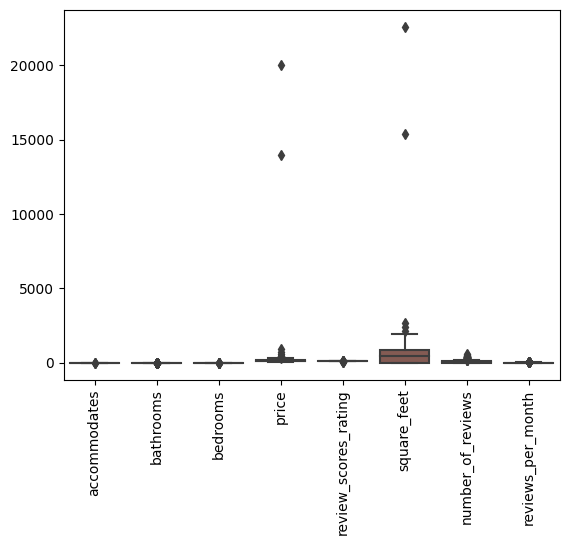

In [54]:
g = sns.boxplot(data=data)

plt.xticks(rotation=90);

## Normalising and standardising

The scales of the variables are still very different. Should you normalise or standardise the data?

Recall that standardisation rescales each variable based on its overall mean and standard deviation. Normalisation rescales each variable to be between 0 and 1.

Let's see what each one looks like when applied.

Using `sklearn.preprocessing.StandardScaler` and `sklearn.preprocessing.MinMaxScaler`, fit and transform the continuous variables.

Then, view their new values as a boxplot using the same command as above.

In [56]:
cont_vars = ['accommodates', 'bathrooms', 'bedrooms', 'price',
             'review_scores_rating', 'square_feet', 'number_of_reviews',
             'reviews_per_month']

In [58]:
from sklearn.preprocessing import StandardScaler

stander = StandardScaler()

# Your code here...
# fit transform the data
standard = stander.fit_transform(data[cont_vars])


In [59]:
from sklearn.preprocessing import  MinMaxScaler

normer = MinMaxScaler()

# Your code here...
min_max = normer.fit_transform(data[cont_vars])

## Encoding discrete variables

In the last part of this practical, we look at the `host_neighbourhood` variable. This is a discrete nominal variable, which is easy to read and understand for us but cannot be processed as is by a machine learning model.

### Using discrete variables as features

To use `host_neighbourhood` as a feature in a model (for instance to predict the value for `price`), it needs to be transformed into a vector representation.

Use `pandas.get_dummies()` to get a vectorized form of `host_neighbourhood`.

This function lets you set a `prefix` for the new columns it creates. Since the default (`host_neighbourhood`) is a bit long, set it to something shorter.

In [63]:
from pandas import get_dummies
# Your code here...
# one hot encode the data
one_hot = get_dummies(data, columns = ["host_neighbourhood"], prefix="V")
one_hot

,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month,V_Bos en Lommer,V_De Pijp,V_Grachtengordel,V_Indische Buurt,V_Jordaan,V_Oost,V_Oosterparkbuurt,V_Oud-West,V_Rivierenbuurt
1,2,1.0,1,100,80.0,700,61,5.083333,False,False,True,False,False,False,False,False,False
2,4,1.0,2,200,94.0,484,30,2.500000,False,False,True,False,False,False,False,False,False
3,2,1.0,1,150,93.0,721,3,0.250000,True,False,False,False,False,False,False,False,False
4,6,2.0,3,420,98.0,1507,318,26.500000,False,False,True,False,False,False,False,False,False
5,2,1.5,1,78,93.0,22600,74,6.166667,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,2,1.0,0,135,98.0,377,51,4.250000,False,False,False,False,False,False,False,True,False
405,2,1.0,2,120,97.0,0,30,2.500000,False,False,True,False,False,False,False,False,False
406,2,1.0,1,100,100.0,0,12,1.000000,False,False,True,False,False,False,False,False,False
407,4,1.0,4,152,90.0,0,2,0.166667,False,False,False,False,False,False,True,False,False


### Using discrete variables as targets

`get_dummies()` is good if you want to one-hot encode input features. There are instances however where you wish to obtain a numerical labels (often the case for the categorical output of a model).

Most machine learning packages convert categorical output variables of type string into numerical labels automatically.

For instance, you can use pandas series's method `.astype()` to obtain numerical catgeorical labels:

In [64]:
data.host_neighbourhood.astype('category').cat.codes

1      2
2      2
3      0
4      2
5      4
      ..
404    7
405    2
406    2
407    6
408    7
Length: 397, dtype: int8

# Next steps

* Apply these ideas to your own data, where you have a better understanding of what should be done with `NaN`s, zeroes and so on.
* Train some simple models using original features, standardised features and normalised features - what happens to model performance in each case?
* We used `pandas` functionality here for one-hot encoding, because it works easily on a single column of data, but try `sklearn.preprocessing.OneHotEncoder`, which expects multiple columns or data to be reshaped first.